In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# RAM
df = pd.DataFrame(pd.read_csv("acc.csv", sep=",", skiprows=1, header=None))
df.columns= ["step", "acc", "min", "max"]
df = df.drop(["min", "max"], axis=1)
print(df)

df_rand = pd.DataFrame(pd.read_csv("random_acc.csv", sep=",", skiprows=1, header=None))
df_rand.columns= ["step", "random_acc", "min", "max"]
df_rand = df_rand.drop(["min", "max"], axis=1)
print(df_rand)

# Time
df2 = pd.DataFrame(pd.read_csv("loss.csv", sep=",", skiprows=1, header=None))
df2.columns= ["step", "loss", "min", "max"]
df2 = df2.drop(["min", "max"], axis=1)
print(df2)

        step       acc
0          0  0.000301
1        101  0.004331
2        202  0.004590
3        303  0.005076
4        404  0.004963
...      ...       ...
2200  222200  0.286915
2201  222301  0.293743
2202  222402  0.299380
2203  222503  0.301629
2204  222604  0.292194

[2205 rows x 2 columns]
        step  random_acc
0          0    0.000143
1        101    0.000239
2        202    0.000190
3        303    0.000159
4        404    0.000239
...      ...         ...
2200  222200    0.000174
2201  222301    0.000285
2202  222402    0.000348
2203  222503    0.000189
2204  222604    0.000189

[2205 rows x 2 columns]
         step       loss
0           1  61.072853
1           5  54.546089
2           7  53.305073
3          13  49.988686
4          14  49.567959
...       ...        ...
99995  222603   4.229533
99996  222604   4.241156
99997  222605   4.216891
99998  222606   4.192657
99999  222608   4.203238

[100000 rows x 2 columns]


In [23]:
step = []
loss = []
for index, row in df.iterrows():
    if (index%5)==0:
        step.append(df.iloc[index, 0])
        loss.append(df.iloc[index, 1])
df_clean = {"step": step, "acc":loss}
df_clean = pd.DataFrame(df_clean)
print(df_clean)

step = []
loss = []
for index, row in df_rand.iterrows():
    if (index%100)==0:#30
        step.append(df_rand.iloc[index, 0])
        loss.append(df_rand.iloc[index, 1]+0.001) # just to make the line more visible
df_rand_clean = {"step": step, "random_acc":loss}
df_rand_clean = pd.DataFrame(df_rand_clean)
print(df_rand_clean)

step = []
loss = []
for index, row in df2.iterrows():
    if (index%275)==0:#250
        step.append(df2.iloc[index, 0])
        loss.append(df2.iloc[index, 1])
df2_clean = {"step": step, "loss":loss}
df2_clean = pd.DataFrame(df2_clean)
print(df2_clean)

       step       acc
0         0  0.000301
1       505  0.005561
2      1010  0.007598
3      1515  0.007521
4      2020  0.009385
..      ...       ...
436  220180  0.291694
437  220685  0.301749
438  221190  0.285309
439  221695  0.291583
440  222200  0.286915

[441 rows x 2 columns]
      step  random_acc
0        0    0.001143
1    10100    0.001206
2    20200    0.001284
3    30300    0.001237
4    40400    0.001190
5    50500    0.001367
6    60600    0.001269
7    70700    0.001284
8    80800    0.001173
9    90900    0.001316
10  101000    0.001223
11  111100    0.001268
12  121200    0.001158
13  131300    0.001143
14  141400    0.001301
15  151500    0.001222
16  161600    0.001158
17  171700    0.001316
18  181800    0.001380
19  191900    0.001176
20  202000    0.001174
21  212100    0.001159
22  222200    0.001174
       step       loss
0         1  61.072853
1       659   6.959002
2      1253   6.822387
3      1896   6.718372
4      2507   6.696987
..      ...        ...

/tmp/ipykernel_378/3043531392.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


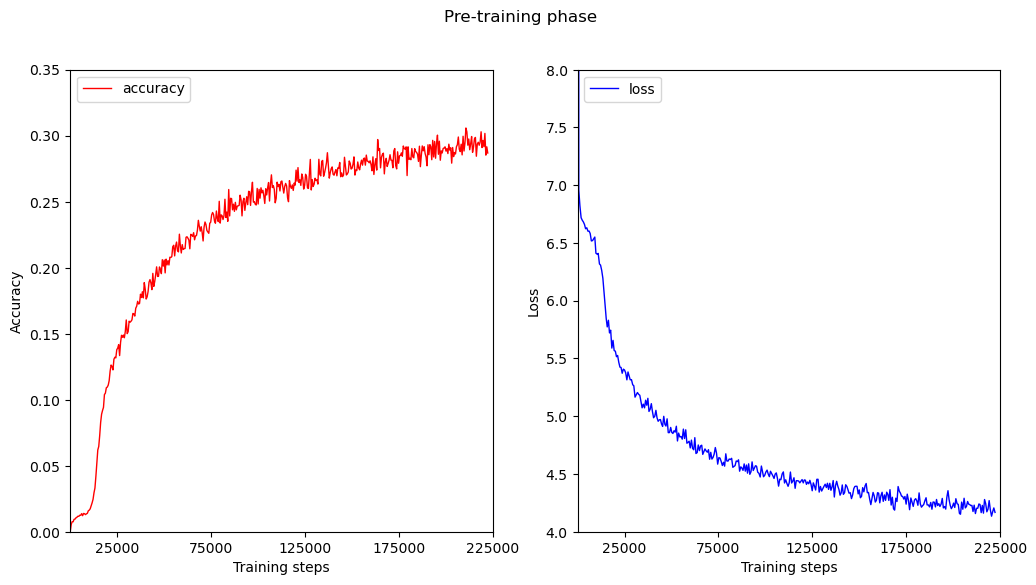

In [24]:
plt.subplots(figsize=(12,6)) # 6 for one row but 12 cause to row
plt.subplot(1, 2, 1)
#m = 430/100
#pointbag_x = range(16, 100)
#pointbag_y = []
#for x in pointbag_x:
#    pointbag_y.append(x*m)
#plt.plot(pointbag_y, pointbag_x, label = "Expected",linewidth=1.0, color="silver", linestyle="", marker="o", markersize=2.5)
#plt.plot(df["step"],df["acc"],linestyle="rl",marker="-", markersize=2, label="Measured", color="red")
#plt.plot(df["step"],df["acc"],linewidth=1.0, color="green", label="acc")
plt.plot(df_clean["step"],df_clean["acc"], color="red", label="accuracy", linestyle="-", marker="", markersize=1.0, linewidth=1.0)
plt.ylim(0, 0.35)
plt.xlim(0,225000)
#plt.gca().spines['right'].set_color('none')
#plt.gca().spines['top'].set_color('none')
#plt.title("Training tokenizer on varying subset size")
plt.suptitle('Pre-training PlantBERT')
plt.ylabel("Accuracy")
plt.xlabel("Steps")
#plt.plot(df_rand["step"],df_rand["random_acc"],linewidth=2.5, color="red", label="rand_acc")
#plt.plot(df_rand_clean["step"],df_rand_clean["random_acc"], color="green", label="random accuracy", linestyle="-", marker="", markersize=2.0)
plt.xticks([25000, 75000,125000,175000,225000])
plt.legend(loc='upper left')
plt.suptitle('Pre-training phase')
plt.xlabel("Training steps")

plt.subplot(1, 2, 2)
#m2 = 20/15
#pointbag_x2 = range(16, 100)
#pointbag_y2 = []
#for x in pointbag_x2:
#    pointbag_y2.append(x*m2)
#plt.plot(pointbag_y2, pointbag_x2, label = "Expected",linewidth=1.0, color="silver", linestyle="", marker="o", markersize=2.5)
#plt.plot(df2["duration"], df2["tokenizer_lines"],linestyle="",marker="o", markersize=2, label="Measured", color="red")
#plt.plot(df2_clean["step"],df2_clean["loss"],linewidth=1.0, color="blue", label="loss")
plt.plot(df2_clean["step"],df2_clean["loss"],color="blue", label="loss", linestyle="-", marker="", markersize=1.0, linewidth=1.0)
plt.ylim(4, 8)
plt.xlim(0,225000)
#plt.gca().spines['right'].set_color('none')
#plt.gca().spines['top'].set_color('none')
#plt.ylabel("Trained on rows [*100 000]")
plt.ylabel("Loss")
plt.xlabel("Training steps")
#plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.95))
plt.xticks([25000, 75000,125000,175000,225000])
plt.legend(loc='upper left')

plt.savefig('plot_pretrain.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()